# QCTO - Workplace Module

### Project Title: Banking Data Analysis - Product Marketing Model
#### Done By: Michael Kaudi

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

One of the most important ways that companies use to increase revenue and profitability is by onboarding more customers. To do this, the services and products must be advertised and marketed to the customers. Companies always look for possible way to reduce or optimize expenditure while improving revenue and profits.

An effective way to do this over the years has been telephonic marketing. However there is always room to look into increasing the rate at which the marketing team gets customers to sign on. 

This project looks into utilizing machine learning to predict the possibility of a customer taking up a product in the banking sector The product in question is cash investment and the dataset is from a Portuguese banking institution and can be found on the below link.

https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets

The data includes information of customers such as age, job, marital status, educational level etc to determine the likelihood of the customer taking up the investment.

---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [127]:
#Please use code cells to code in and do not forget to comment your code.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for the machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#libraries for the evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

The data was downloaded from the below link

https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets

It contains data related to customers such as age, job, marital status', educational levels, if they own a home or already have a loan etc. There are about 17 columns in total. 7 of the columns are of integer type, 6 are string data type and the remaining 4 are boolean data type.

The data came already separated into the train and test datasets.

---

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
The data is read in from the 2 dataset files, train and test datasets, into 2 pandas dataframes. To ensure they are read in correctly, a delimiter parameter is specified in the read_csv method.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [128]:
#read in the datasets into the 2 dataframes
test = pd.read_csv('data/test.csv', delimiter=';')
train = pd.read_csv('data/train.csv', delimiter=';')

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [129]:
#Quick view of the first 5 rows fo the test data
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [130]:
#Quick view of the first 5 rows fo the test data
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [131]:
#print out the number of columns per dataset
print(f"Test data columns count:\n{len(test.columns)}\n")

print(f"Train data columns count:\n{len(train.columns)}\n")

Test data columns count:
17

Train data columns count:
17



In [132]:
#the distribution of the yes and no on both the data sets
print(train['y'].value_counts())
print(test['y'].value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64
y
no     4000
yes     521
Name: count, dtype: int64


In [133]:
#Check the nulls in the 2 datasets
print(f"Test data nulls:\n{test.isna().sum()}\n")
print(f"Train data nulls:\n{train.isna().sum()}")

Test data nulls:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Train data nulls:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [134]:
#statistical analysis of the numerical columns in the train dataset
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [135]:
#statistical analysis of the numerical columns in the test dataset
test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation 
matrices. Discuss any significant findings.
The below visualizations start by exploring the existence of outliers which may impact negatively on the modeling. 

All the columns, except for the pdays column, have a certain levels of outliers as can be seen on the boxplots. To address this issue, the IQR (Interquartile Range) method is used. Post the implementation of this method, the is a reduction on the outliers.

Further exploration is performed on the distributions of the different columns. The blue-collar, management and technician jobs came up as the top 3 most jobs dont by the customers in the dataset. There are more customers with housing that those without and most of the customers do not already have loans. Most of the customers have secondary education and most customer are married.

---


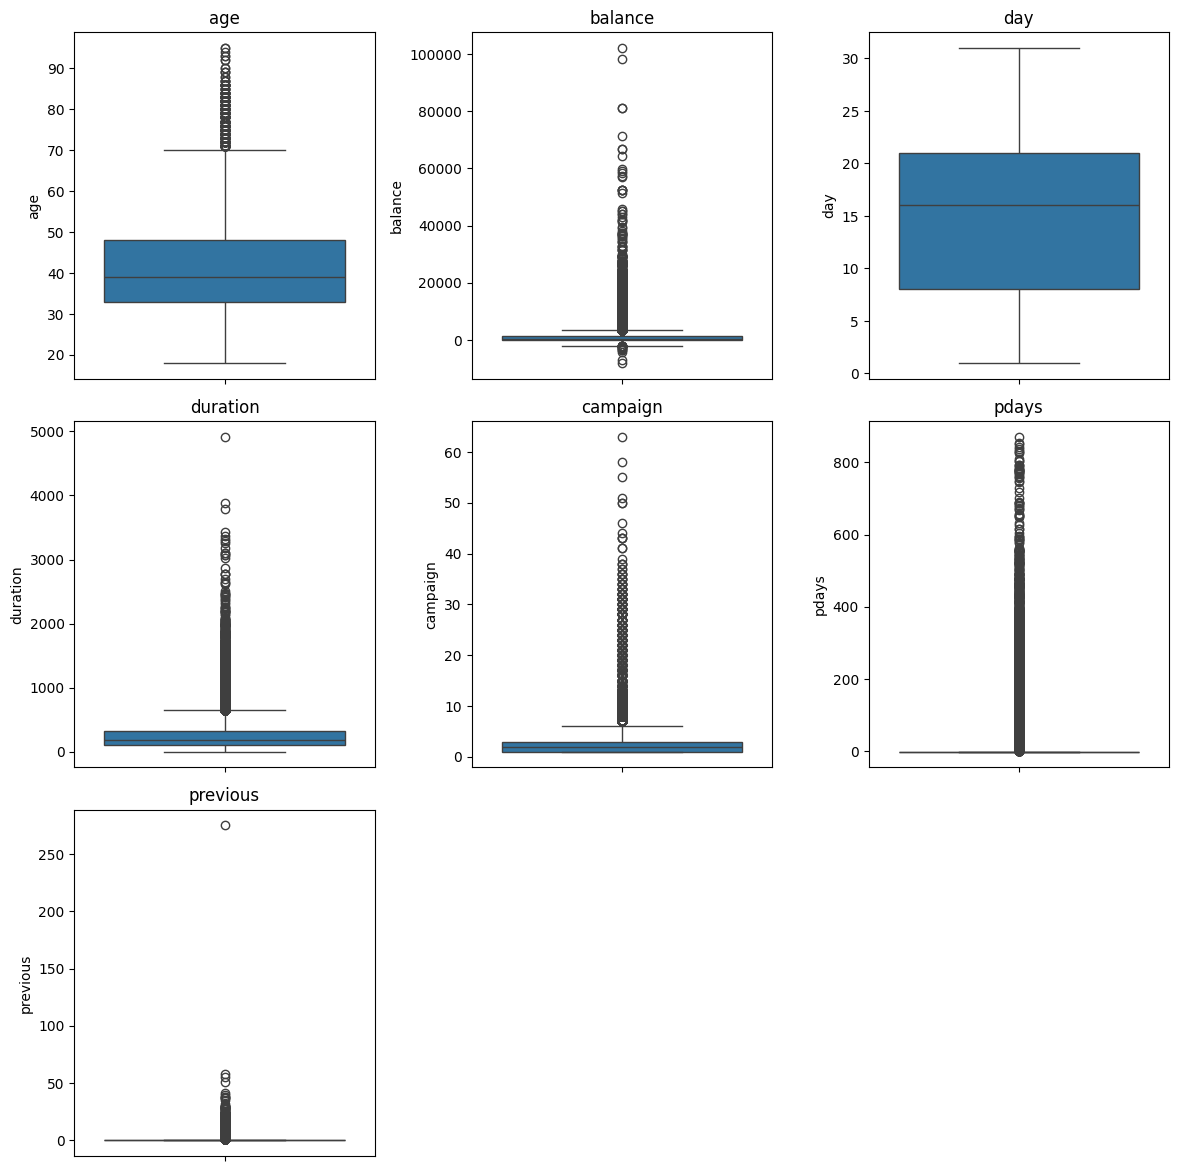

In [136]:
r = 0
c = 0

cols_num = train.select_dtypes(include=['number'])

fig, axs = plt.subplots(3,3, figsize=(12,12))

# Create separate boxplots for each category
for col in cols_num:
    if c < 3:
        axs[r,c].set_title(col)
        sns.boxplot(data=train[col], ax=axs[r,c])
        c += 1
    else:
        r += 1
        c=0
        axs[r,c].set_title(col)
        sns.boxplot(data=train[col], ax=axs[r,c])
        c = 1

        
plt.tight_layout()

def remove_empty_subplots(fig):
    # Iterate over all axes in the figure
    for ax in fig.get_axes():
        # Check if the axes have any data
        if not ax.has_data():
            # Remove the axes if they are empty
            fig.delaxes(ax)

# Remove empty subplots
remove_empty_subplots(fig)

In [137]:

def count_outliers_and_replace_with_median(data):

    #data_num_cols = data.select_dtypes(include=['number'])
    for col in data.select_dtypes(include=['number']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the number of outliers
        outliers = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]
        num_outliers = outliers.count()
        print(f"The number of outliers PRE in {col} is: {num_outliers}")

        median = data[col].median()
        data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), median, data[col])

        outliers_post = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]
        num_outliers_post = outliers_post.count()
        print(f"The number of outliers POST in {col} is: {num_outliers_post}")
    return data


test = count_outliers_and_replace_with_median(test)
train = count_outliers_and_replace_with_median(train)

The number of outliers PRE in age is: 38
The number of outliers POST in age is: 0
The number of outliers PRE in balance is: 506
The number of outliers POST in balance is: 0
The number of outliers PRE in day is: 0
The number of outliers POST in day is: 0
The number of outliers PRE in duration is: 330
The number of outliers POST in duration is: 0
The number of outliers PRE in campaign is: 318
The number of outliers POST in campaign is: 0
The number of outliers PRE in pdays is: 816
The number of outliers POST in pdays is: 0
The number of outliers PRE in previous is: 816
The number of outliers POST in previous is: 0
The number of outliers PRE in age is: 487
The number of outliers POST in age is: 0
The number of outliers PRE in balance is: 4729
The number of outliers POST in balance is: 0
The number of outliers PRE in day is: 0
The number of outliers POST in day is: 0
The number of outliers PRE in duration is: 3235
The number of outliers POST in duration is: 0
The number of outliers PRE in 

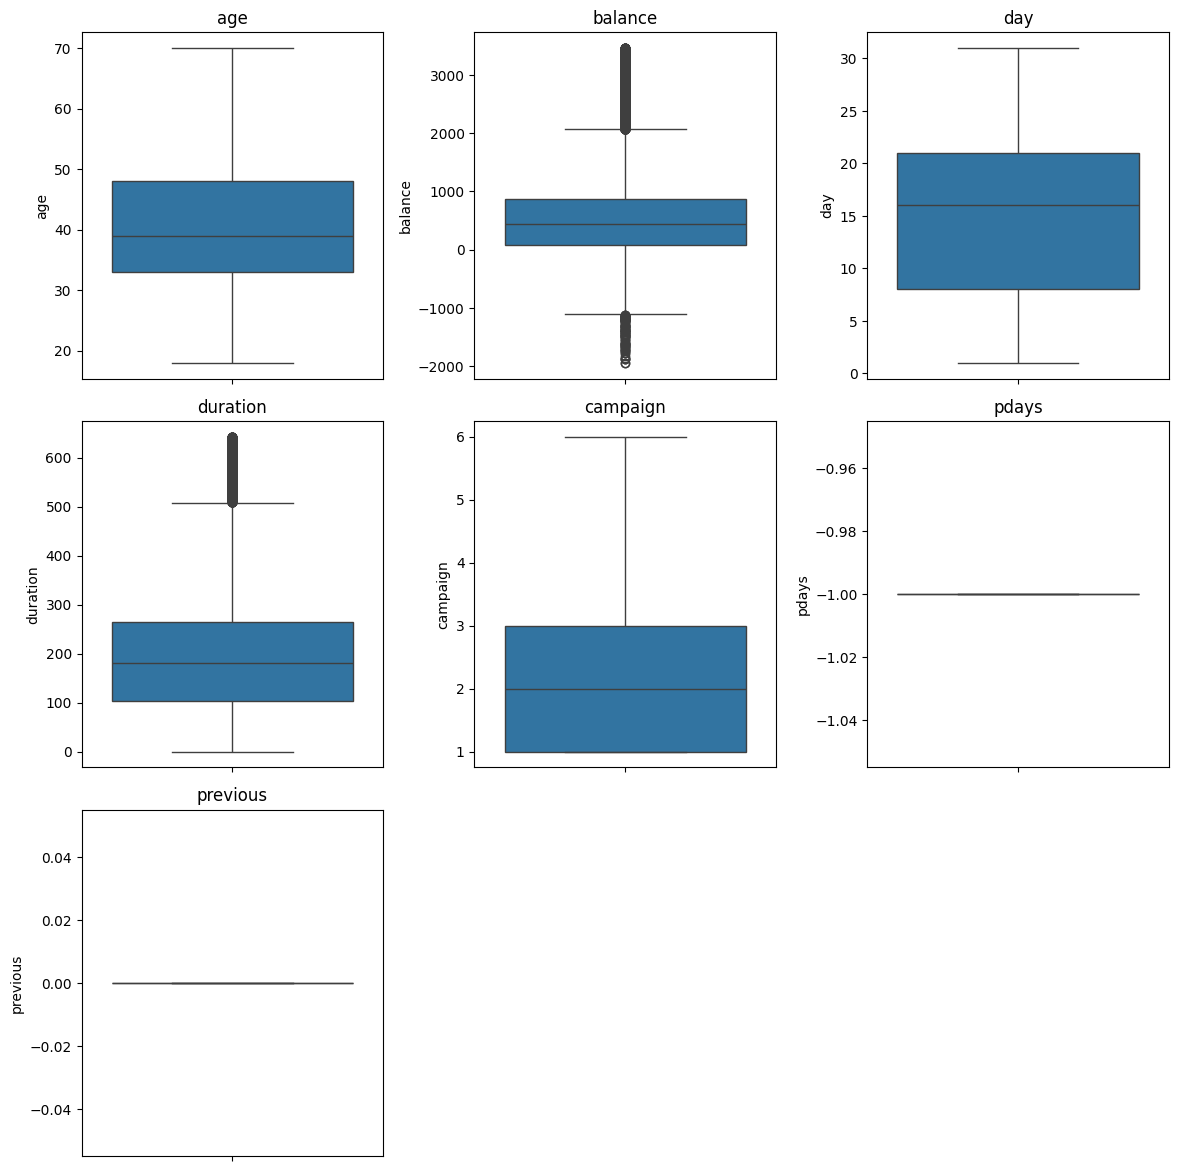

In [138]:
r = 0
c = 0
#categories = df['Category'].unique()

cols_num = train.select_dtypes(include=['number'])

fig, axs = plt.subplots(3,3, figsize=(12,12))
# Create separate boxplots for each category
for col in cols_num:
    if c < 3:
        axs[r,c].set_title(col)
        sns.boxplot(data=train[col], ax=axs[r,c])
        c += 1
    else:
        r += 1
        c=0
        axs[r,c].set_title(col)
        sns.boxplot(data=train[col], ax=axs[r,c])
        c = 1

        
plt.tight_layout()

def remove_empty_subplots(fig):
    # Iterate over all axes in the figure
    for ax in fig.get_axes():
        # Check if the axes have any data
        if not ax.has_data():
            # Remove the axes if they are empty
            fig.delaxes(ax)

# Remove empty subplots
remove_empty_subplots(fig)

<Axes: xlabel='contact'>

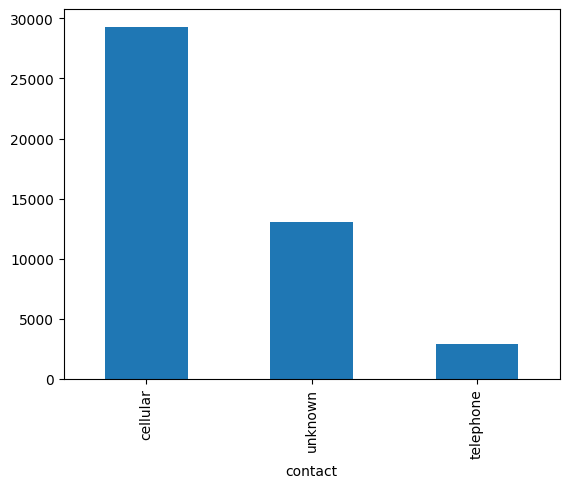

In [139]:
#types contact and the counts
train['contact'].value_counts().plot(kind='bar')

In [140]:
#types of previous and the counts
train['previous'].value_counts()

previous
0.0    45211
Name: count, dtype: int64

In [141]:
#types of pdays and the counts
train['pdays'].value_counts()

pdays
-1.0    45211
Name: count, dtype: int64

<Axes: xlabel='campaign'>

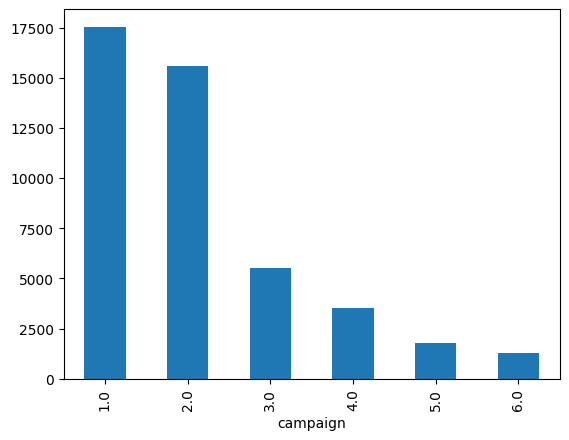

In [142]:
#types of camnpaigns and the counts
train['campaign'].value_counts().plot(kind='bar')

<Axes: xlabel='duration'>

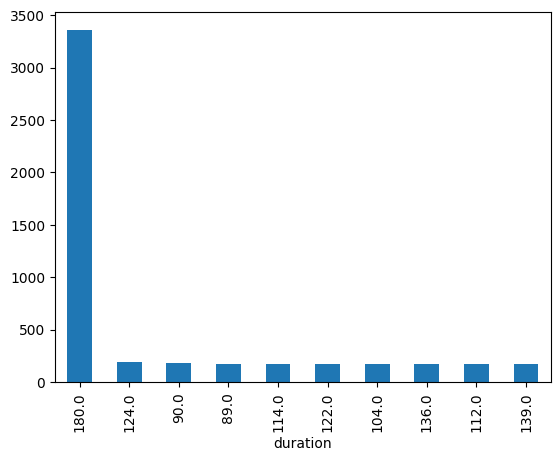

In [143]:
#top 10 durations distributions
train['duration'].value_counts().head(10).plot(kind='bar')

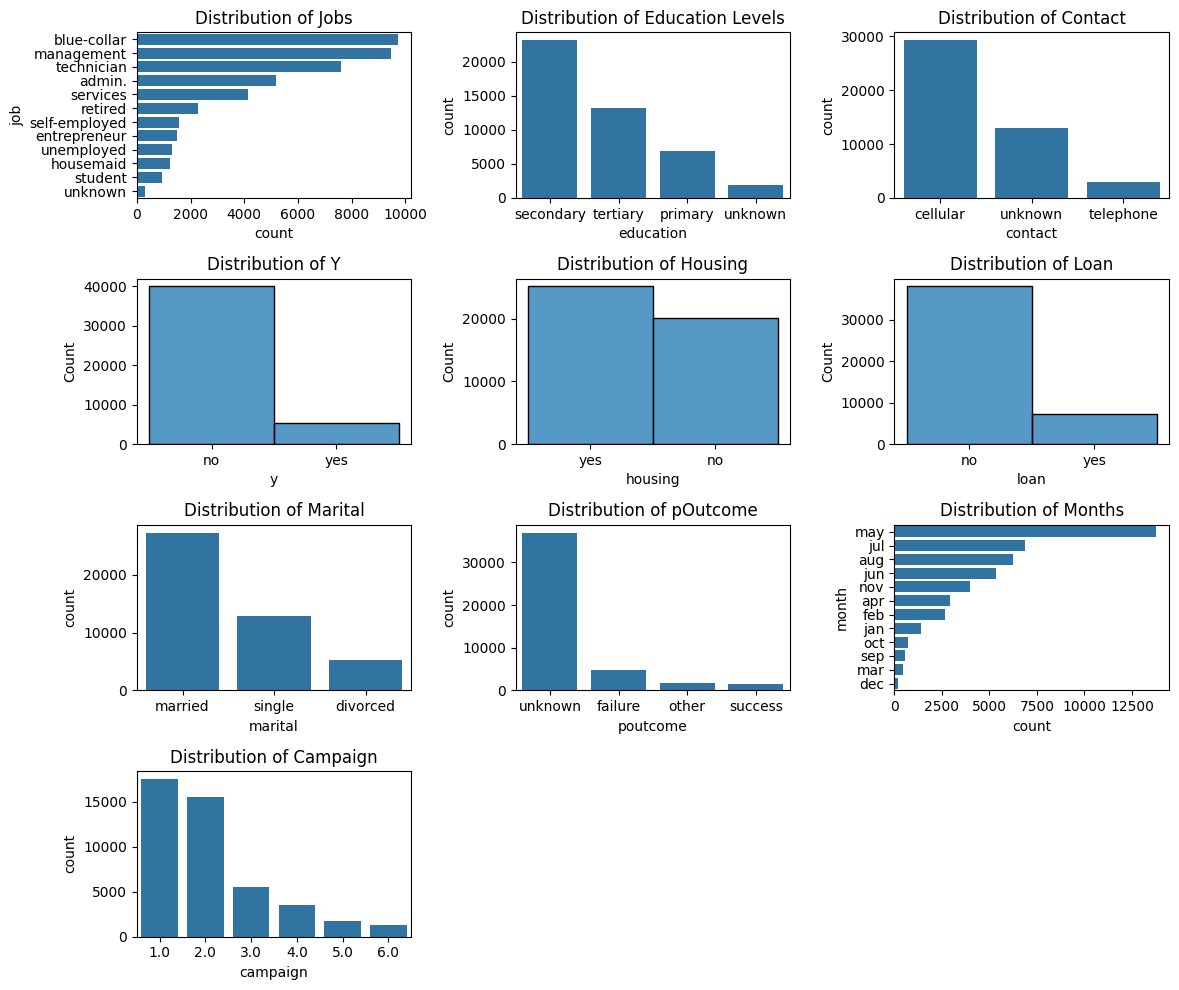

In [144]:
#Visualize the distributions of the different columns to reveal insights

figs, axs = plt.subplots(4,3, figsize=(12,10))

axs[0,0].set_title('Distribution of Jobs')
sns.countplot(y=train['job'], order=train['job'].value_counts().index, ax=axs[0,0])

axs[0,1].set_title('Distribution of Education Levels')
sns.countplot(x=train['education'], order=train['education'].value_counts().index, ax=axs[0,1])

axs[0,2].set_title('Distribution of Contact')
sns.countplot(x=train['contact'], order=train['contact'].value_counts().index, ax=axs[0,2])

axs[1,0].set_title('Distribution of Y')
sns.histplot(train['y'], ax=axs[1,0])

axs[1,1].set_title('Distribution of Housing')
sns.histplot(train['housing'], ax=axs[1,1])

axs[1,2].set_title('Distribution of Loan')
sns.histplot(train['loan'], ax=axs[1,2])

axs[2,0].set_title('Distribution of Marital')
sns.countplot(x=train['marital'], order=train['marital'].value_counts().index, ax=axs[2,0])

axs[2,1].set_title('Distribution of pOutcome')
sns.countplot(x=train['poutcome'], order=train['poutcome'].value_counts().index, ax=axs[2,1])

axs[2,2].set_title('Distribution of Months')
sns.countplot(y=train['month'], order=train['month'].value_counts().index, ax=axs[2,2])

axs[3,0].set_title('Distribution of Campaign')
sns.countplot(x=train['campaign'], order=train['campaign'].value_counts().index, ax=axs[3,0])

plt.tight_layout()
# Remove empty subplots
remove_empty_subplots(figs)

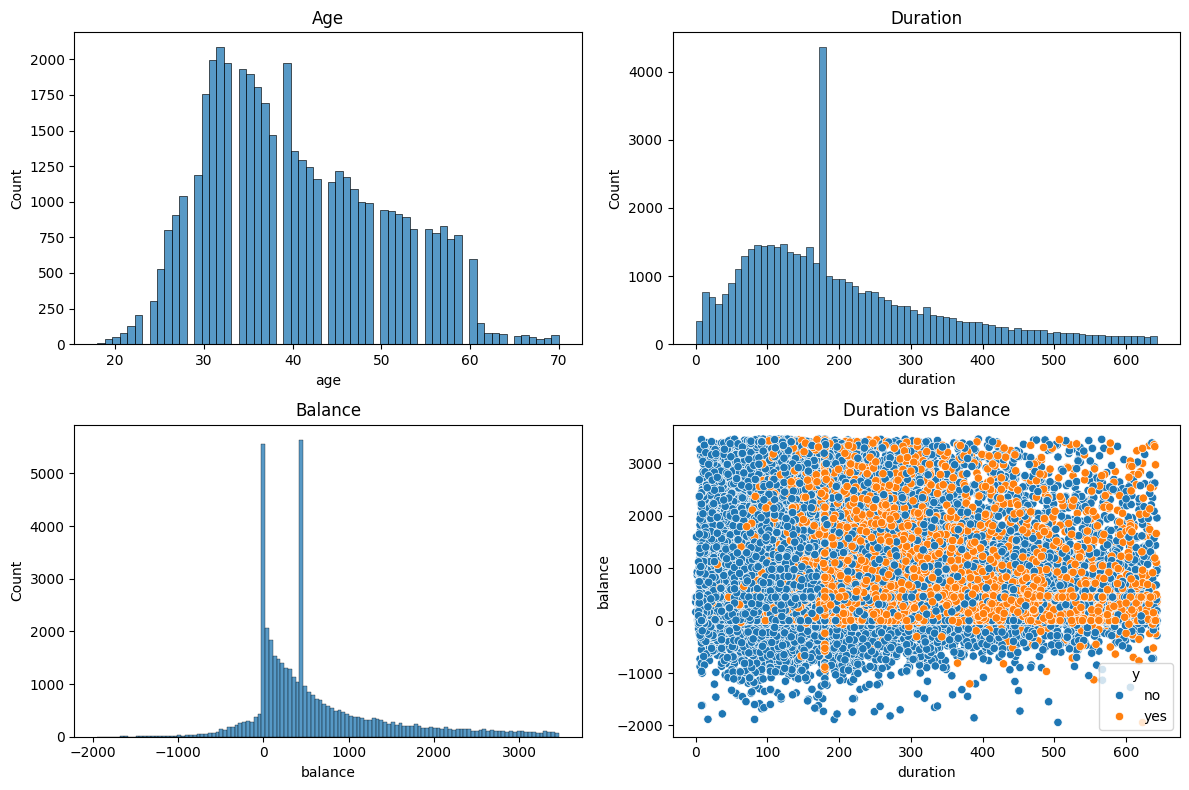

In [145]:
#Further insights on age, duration and balance

figs, axs = plt.subplots(2,2, figsize=(12,8))

axs[0,0].set_title('Age')
sns.histplot(train['age'], ax=axs[0,0])

axs[1,1].set_title('Duration vs Balance')
sns.scatterplot(x=train['duration'], y=train['balance'], hue=train['y'], ax=axs[1,1])

axs[0,1].set_title('Duration')
sns.histplot(train['duration'], ax=axs[0,1])

axs[1,0].set_title('Balance')
sns.histplot(train['balance'], ax=axs[1,0])

plt.tight_layout()

<Axes: title={'center': 'Age vs Duration'}, xlabel='age', ylabel='duration'>

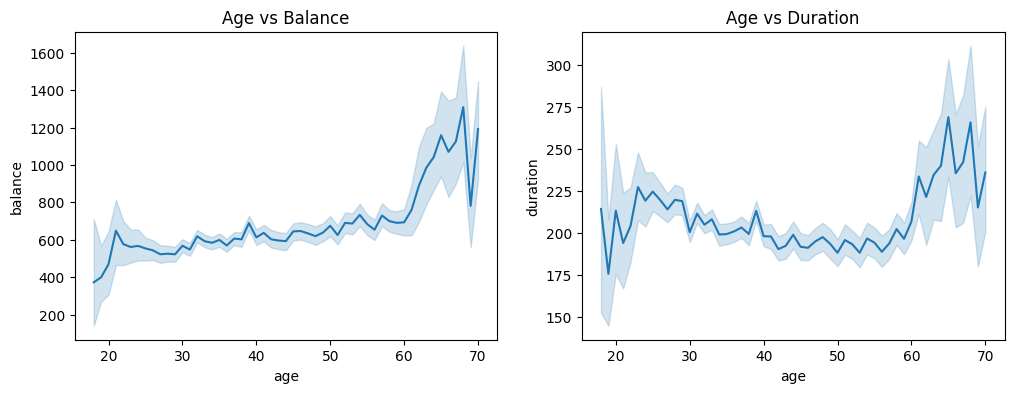

In [146]:
#from the age of 60 there is a steep increase in both the balance and the duration

figs, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].set_title('Age vs Balance')
axs[1].set_title('Age vs Duration')
sns.lineplot(x=train['age'], y = train['balance'], ax=axs[0])
sns.lineplot(x=train['age'], y = train['duration'], ax=axs[1])

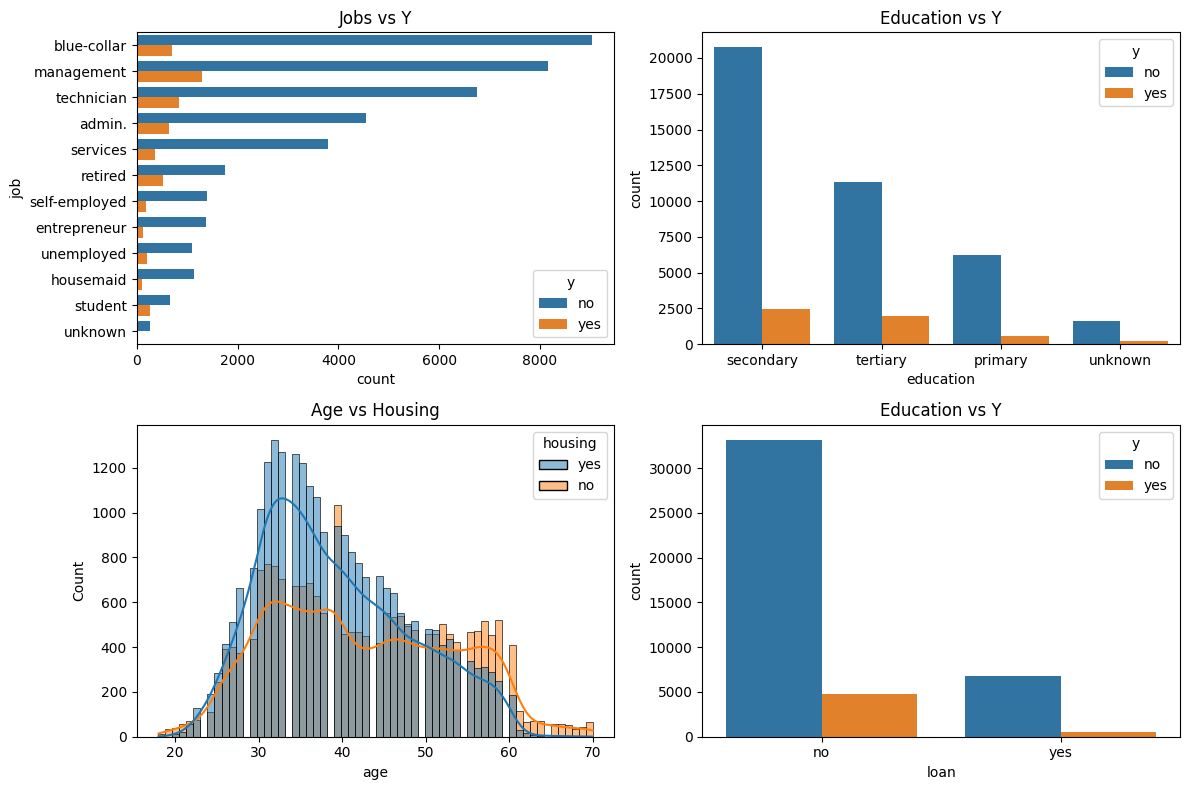

In [147]:
figs, axs = plt.subplots(2,2, figsize=(12,8))

axs[0,0].set_title('Jobs vs Y')
sns.countplot(y=train['job'], order=train['job'].value_counts().index, hue=train['y'], ax=axs[0,0])

axs[0,1].set_title('Education vs Y')
sns.countplot(x=train['education'], order=train['education'].value_counts().index, hue=train['y'], ax=axs[0,1])

axs[1,0].set_title('Age vs Housing')
sns.histplot(x=train['age'], hue = train['housing'], kde=True, ax=axs[1,0])

axs[1,1].set_title('Education vs Y')
sns.countplot(x=train['loan'], order=train['loan'].value_counts().index, hue=train['y'], ax=axs[1,1])

plt.tight_layout()

<Axes: xlabel='count', ylabel='job'>

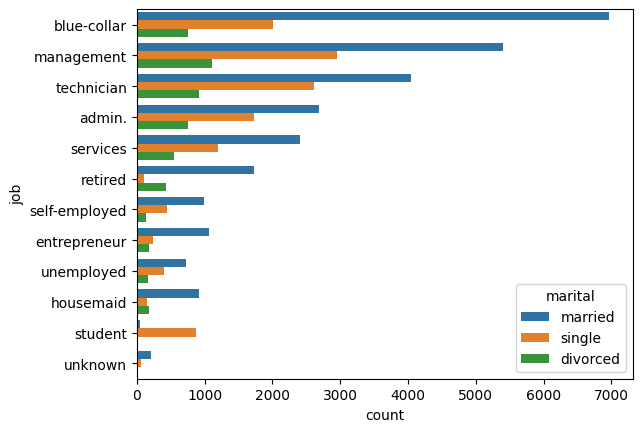

In [148]:
sns.countplot(y=train['job'], order=train['job'].value_counts().index, hue=train['marital'])

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

In the modelling phase, the non numerical variable features are first put through the label encoder in preparation for the model training. The encode encodes the categorical into numerical representations. 

The standard scaler is then utilized to scale the data to reduce the impact of any remaining outliers.

As now all the features have been standardized and encoded, a statistical correlation is run to determine relationship between the variable features and the target variable.

Four (4) models are trained with default parameters and evaluated on their performances

---


In [149]:
#Please use code cells to code in and do not forget to comment your code.
train.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object

In [150]:
test.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object

In [151]:
#Ecoding categorical columns

train_encoded = train.copy()
test_encoded = test.copy()

col_obj_train = train_encoded.select_dtypes(include=['object'])
col_obj_test = test_encoded.select_dtypes(include=['object'])

for col in col_obj_train:
    encoder = LabelEncoder()
    train_encoded[col] = encoder.fit_transform(train_encoded[col])

for col_test in col_obj_test:
    encoder = LabelEncoder()
    test_encoded[col_test] = encoder.fit_transform(test_encoded[col_test])
    
train_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4,1,2,0,2143.0,1,0,2,5.0,8,261.0,1.0,-1.0,0.0,3,0
1,44.0,9,2,1,0,29.0,1,0,2,5.0,8,151.0,1.0,-1.0,0.0,3,0
2,33.0,2,1,1,0,2.0,1,1,2,5.0,8,76.0,1.0,-1.0,0.0,3,0
3,47.0,1,1,3,0,1506.0,1,0,2,5.0,8,92.0,1.0,-1.0,0.0,3,0
4,33.0,11,2,3,0,1.0,0,0,2,5.0,8,198.0,1.0,-1.0,0.0,3,0


In [152]:
train_encoded.corr()['y']

age         -0.015297
job          0.040438
marital      0.045588
education    0.066241
default     -0.022419
balance      0.080674
housing     -0.139173
loan        -0.068185
contact     -0.148395
day         -0.028348
month       -0.024471
duration     0.209860
campaign    -0.063071
pdays             NaN
previous          NaN
poutcome    -0.077840
y            1.000000
Name: y, dtype: float64

<Axes: >

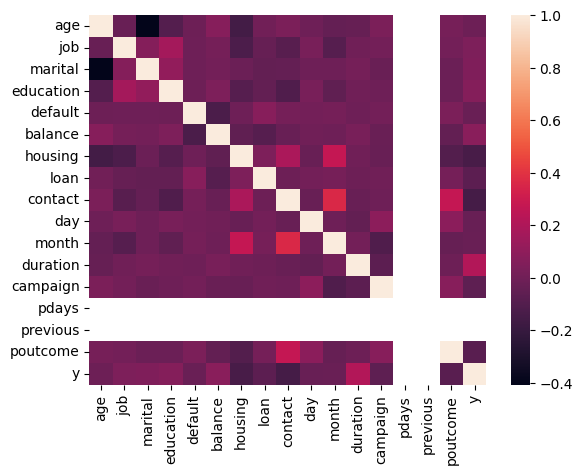

In [153]:
sns.heatmap(train_encoded.corr())

In [154]:
#Because the data is already split into train and test, split the target from variable on both datasets

X_train = train_encoded.drop(columns = ['y'])
y_train = train_encoded['y']

X_test = test_encoded.drop(columns=['y'])
y_test = test_encoded['y']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_train)

In [155]:
#initialization of the different models
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
lr = LogisticRegression()
dct = DecisionTreeClassifier()


In [156]:
#training the models
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
lr.fit(X_train, y_train)
dct.fit(X_train, y_train)


c:\Users\kaudim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [157]:
#list of the model

model_list = [rf, gb, lr, dct]

In [158]:
def model_perf(model_list):
    '''
    The function takes in a list of model, runs predictions and evaluates the mtrics which are then saved into dataframes

    args: 
        - model_list: a list of trained models
    returns:
        - dataframes with the different metrics results
    
    '''

    #initialise the dataframes
    df_acc  = pd.DataFrame()
    df_prec = pd.DataFrame()
    df_rec = pd.DataFrame()
    df_f1 = pd.DataFrame()

    #iterate through the models
    for model in model_list:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')

        # Store as DataFrames with one row per model
        df_acc.loc[0, f'{model.__class__.__name__}_acc'] = accuracy
        df_prec.loc[0, f'{model.__class__.__name__}_prec'] = precision
        df_rec.loc[0, f'{model.__class__.__name__}_rec'] = recall
        df_f1.loc[0, f'{model.__class__.__name__}_f1'] = f1

    return df_acc, df_prec, df_rec, df_f1



C:\Users\kaudim\AppData\Local\Temp\ipykernel_29316\1993799985.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[r, c].set_xticklabels(rotation=90, labels =df_labels )
C:\Users\kaudim\AppData\Local\Temp\ipykernel_29316\1993799985.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[r, c].set_xticklabels(rotation=90, labels =df_labels )
C:\Users\kaudim\AppData\Local\Temp\ipykernel_29316\1993799985.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[r, c].set_xticklabels(rotation=90, labels =df_labels )
C:\Users\kaudim\AppData\Local\Temp\ipykernel_29316\1993799985.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[r, c].set_xticklabels(r

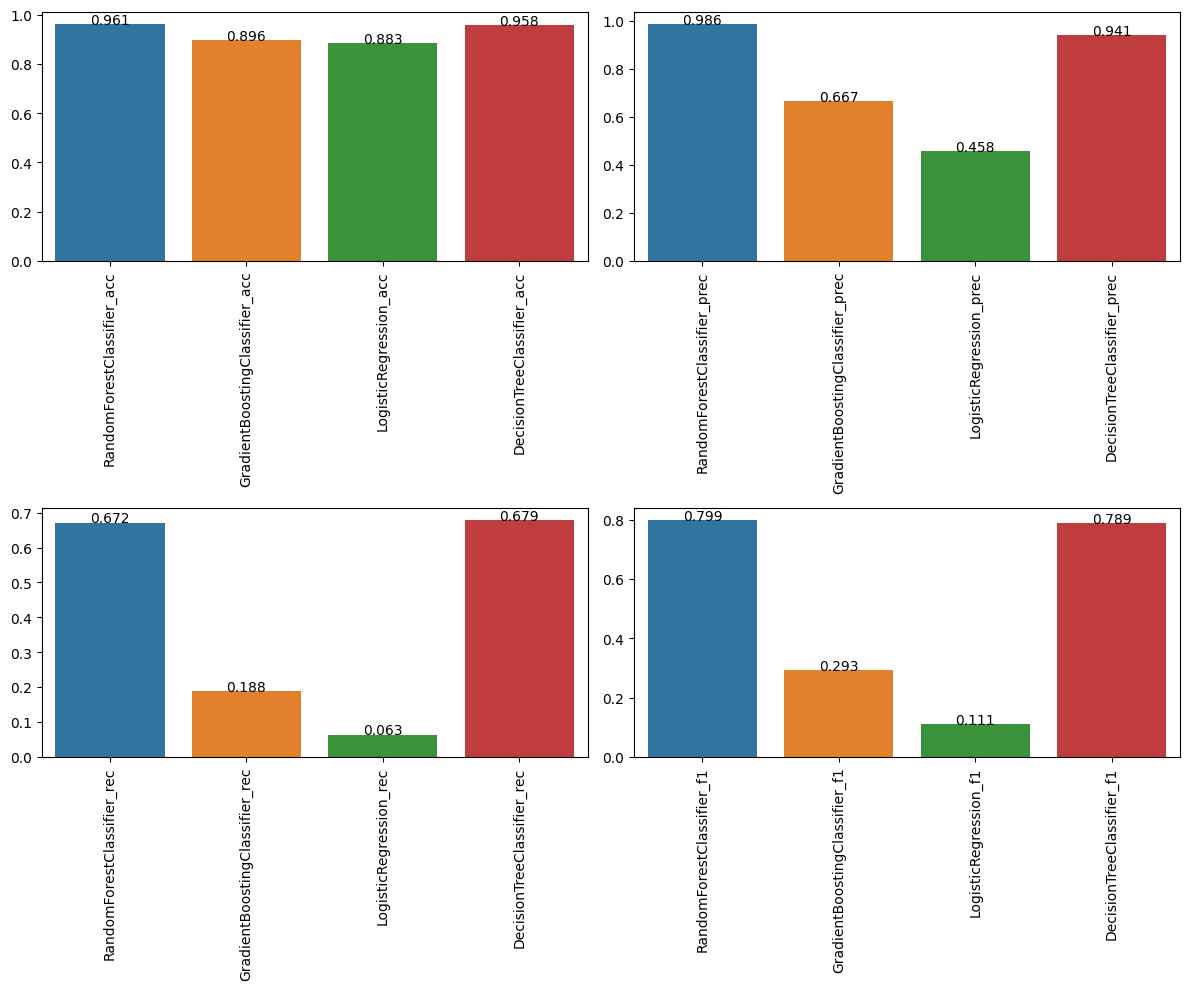

In [159]:
#plot the metrics to compare the performance

figs, axs = plt.subplots(2,2, figsize=(12,10))
r = 0
c = 0

for model_df in model_perf(model_list):
    df_labels = model_df.columns

    bplot = sns.barplot(data=model_df, ax=axs[r, c])
    axs[r, c].set_xticklabels(rotation=90, labels =df_labels )

    # Add values on top of each bar
    for p in bplot.patches:
        bplot.annotate(format(p.get_height(), '.3f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', 
                        xytext=(0, 3), 
                        textcoords='offset points')

    if c < 1:
        c+=1
    elif r < 1:
        r+=1
        c=0

 # Rotate x-axis labels by 45 degrees
#plt.xticks(rotation=80)
plt.tight_layout()


In [160]:
feature_importance_rf = rf.feature_importances_


features = X_train.columns
important_feats = pd.DataFrame({'Feature': features, 'Importance':feature_importance_rf})

important_feats = important_feats.sort_values(by='Importance', ascending=False)
important_feats

,Feature,Importance
11,duration,0.257652
5,balance,0.125203
0,age,0.115423
9,day,0.106795
10,month,0.101104
15,poutcome,0.069241
1,job,0.059208
12,campaign,0.040224
3,education,0.031389
8,contact,0.027630


In [161]:
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=3)
cv_scores_gb = cross_val_score(gb, X_train, y_train, cv=3)
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=3)
cv_scores_dct = cross_val_score(dct, X_train, y_train, cv=3)



c:\Users\kaudim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kaudim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sci

In [162]:
cross_val_scores = {'RandomForestClassifier': cv_scores_rf,
              'GradientBoostingClassifier': cv_scores_gb,
              'LogisticRegression': cv_scores_lr,
              'DecisionTreeClassifier': cv_scores_dct}

df_cross_vals = pd.DataFrame.from_dict(cross_val_scores, orient='index')


([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestClassifier'),
  Text(1, 0, 'GradientBoostingClassifier'),
  Text(2, 0, 'LogisticRegression'),
  Text(3, 0, 'DecisionTreeClassifier')])

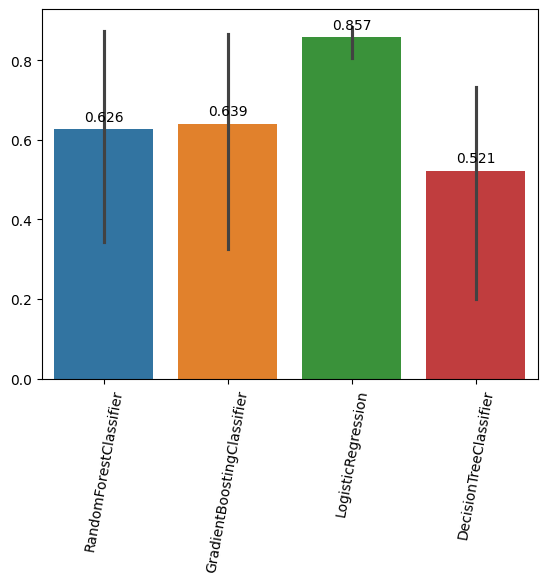

In [163]:
bplot = sns.barplot(data=df_cross_vals.T)

# Add values on top of each bar
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.3f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=80)


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

The RandomForestClassifier model shows to be the best performing model across the different metrics and thus is chosen for this problem.
---


In [164]:
#print the classification report.
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4000
           1       0.99      0.67      0.80       521

    accuracy                           0.96      4521
   macro avg       0.97      0.84      0.89      4521
weighted avg       0.96      0.96      0.96      4521



---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* The dataset came already partitioned into the train and the test sets. The training set was chosen for exploratory data analysis due to it containing more data than the test dataset. 

Below are some of the main findings from the training dataset:
- Blue-collar, management and technician are the top 3 jobs our customers do.
- Most of the customers have secondary education. (need to verify if we cant get better data of working people)
- As many may have expected, the most customers are better reached on their cellular than on telephones (fixed telephones)
- Most of our customers do not yet have loans. This may be aligned to the insight that indicates that most of these customers contacted are only have secondary school education and may not be working yet.
- Customers in management positions are more likely to take up the product than those that are not.

* The study looks to be limited in terms of having undesirable imbalance in terms of  the level of education in our data. There is further imbalance in the target variable which has an impact on the prediction model by introducing bias. 
---


In [165]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* The dataset was acquired from the kaggle website on the below listed link.

https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets

For libraries used in this project, the below documentation websites were utilized in understanding the use and parameters of the libraries.

Pandas: https://pandas.pydata.org/

Seaborn: https://seaborn.pydata.org

Matplotlib: https://matplotlib.org

Scikit-Learn: https://scikit-learn.org


---

In [166]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
